In [ ]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils, probeReadWrite
from pyCascade.probeReadWrite import read_probes_file_switch
from filloutVentilationStats import *
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import matplotlib.ticker as ticker
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from cycler import cycler
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import statsmodels.api as sm
import warnings

plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

## Runs

In [2]:


multiRun_dir = f"{home_dir}/CHARLES/multiRuns/"
plotFolder = f"{multiRun_dir}"

## Read in results

In [3]:
overWrite = False
if os.path.exists(f"{multiRun_dir}/roomVentilationMI.csv") == False or os.path.exists(f"{multiRun_dir}/flowStatsMI.csv") == False or overWrite:

    runs = {
        253: {'A': 45, 'WS': 2, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        254: {'A': 45, 'WS': 4, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        255: {'A': 0,  'WS': 2, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        256: {'A': 0,  'WS': 4, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        321: {'A': 45, 'WS': 2, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        322: {'A': 45, 'WS': 4, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        323: {'A': 0,  'WS': 2, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        324: {'A': 0,  'WS': 4, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
    }

    flowStatsMI, roomVentilationMI = readRunStats(runs, home_dir, scratch_dir, multiRun_dir = plotFolder)
else:
    flowStatsMI = pd.read_csv(f"{multiRun_dir}/flowStatsMI.csv", index_col = [0,1])
    roomVentilationMI = pd.read_csv(f"{multiRun_dir}/roomVentilationMI.csv", index_col = [0,1])

In [25]:
def IQR(dist):
    return np.percentile(dist, 75) - np.percentile(dist, 25)
def range(dist):
    return (dist.min(), dist.max())

In [ ]:
spreads.rows


In [66]:
spreads

,C,AofA,WS,delT
param,NaN,NaN,NaN,NaN
value,NaN,NaN,NaN,NaN


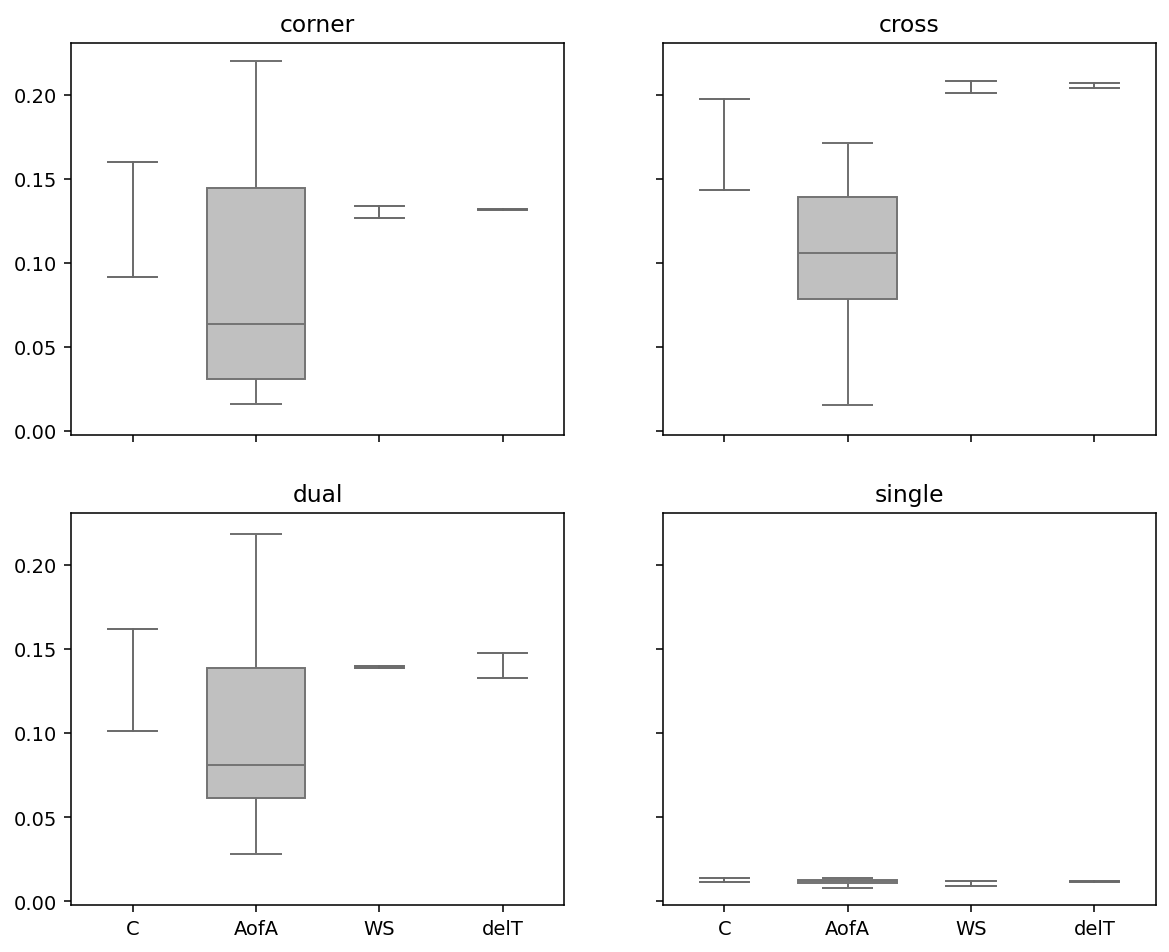

In [80]:
qoi = "mean-sn_prod(abs(u))-Norm"
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

roomTypes = roomVentilationMI["roomType"].unique()
params = ["C", "AofA", "WS", "delT"]
for i, roomType in enumerate(roomTypes):
    spreads = pd.DataFrame(index = ["param", "value"])
    for p in params:
        values = roomVentilationMI[p].unique()
        for v in values:
            df = roomVentilationMI[(roomVentilationMI[p] == v) & (roomVentilationMI["roomType"] == roomType)][qoi]
            # roomSpread = IQR(roomVentilationMI[roomVentilationMI["roomType"] == roomType][qoi])
            # df /= roomSpread

            spreads[f"{p}-{v}"] = [p, IQR(df)]
    spreads = spreads.T
    sns.pointplot(ax=axes[i], data = spreads, x="param", y="value", color="dimgray", errorbar=range, capsize=.4, markersize=0, linestyles='None', linewidth=1)    
    sns.boxplot(ax=axes[i], data = spreads[spreads["param"]=="AofA"], x="param", y="value", color="silver", linewidth=1, fliersize=0)

    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].set_title(roomType)